In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) 

17465344/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [2]:
import numpy as np

def vectorize_sequence(sequences, dimension=10000) :
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



In [4]:

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, 
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.5845 - accuracy: 0.6992 - val_loss: 0.3812 - val_accuracy: 0.8703
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3145 - accuracy: 0.9073 - val_loss: 0.3160 - val_accuracy: 0.8750
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2241 - accuracy: 0.9283 - val_loss: 0.2775 - val_accuracy: 0.8908
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1727 - accuracy: 0.9442 - val_loss: 0.2936 - val_accuracy: 0.8814
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1401 - accuracy: 0.9561 - val_loss: 0.2821 - val_accuracy: 0.8883
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1127 - accuracy: 0.9663 - val_loss: 0.3279 - val_accuracy: 0.8774
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0940 - accuracy: 0.9750 - val_loss: 0.3166 - val_accuracy: 0.8823
Epoch 8/20
30

In [5]:
from keras import models
from keras import layers

model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(partial_x_train, 
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))



Epoch 1/20
30/30 [==============================] - 1s 32ms/step - loss: 0.6582 - accuracy: 0.5916 - val_loss: 0.5026 - val_accuracy: 0.8014
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.5096 - accuracy: 0.7631 - val_loss: 0.3916 - val_accuracy: 0.8734
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4238 - accuracy: 0.8283 - val_loss: 0.3206 - val_accuracy: 0.8843
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3521 - accuracy: 0.8755 - val_loss: 0.2939 - val_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3087 - accuracy: 0.8864 - val_loss: 0.2840 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2605 - accuracy: 0.9111 - val_loss: 0.2730 - val_accuracy: 0.8903
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2336 - accuracy: 0.9229 - val_loss: 0.2784 - val_accuracy: 0.8893
Epoch 8/20
30

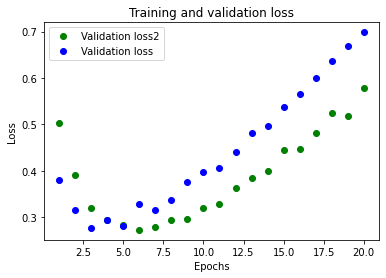

In [6]:
import matplotlib.pyplot as plt

history_dict = history.history
hist2_dict = history2.history

loss = hist2_dict['val_loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'go', label='Validation loss2')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()